In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
path = 'C:/Users/lion5/projects/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=12)
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [25]:
v_place = pd.read_csv("RocketPunch_ing01.csv", encoding = 'utf-8')
f_place = pd.read_csv("gangnam_idx100.csv_axis.csv", encoding = 'euc-kr')

In [26]:
v_place = v_place[v_place.address != 'ERROR_CODE']
v_place['year_found'] = v_place.date_found.apply(lambda x: int(x.split("-")[0]))
v_place['address_gu'] = v_place.address.apply(lambda x: x.split(' ')[1])
v_place['address_si'] = v_place.address.apply(lambda x: x.split(' ')[0])
v_place['axis_x'] = v_place.axis_x.astype(float)
v_place['axis_y'] = v_place.axis_y.astype(float)
v_place = v_place[(v_place.year_found >= 2013) & (v_place.year_found <= 2017)]
v_place = v_place[(v_place.address_si == '서울특별시')]
v_place = v_place[v_place.address_gu == '강남구']
v_place.drop(['index', 'year_found'], axis = 1, inplace = True)
v_place.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 2295
Data columns (total 12 columns):
name             491 non-null object
url              491 non-null object
date_found       491 non-null object
number_people    491 non-null object
location         491 non-null object
series           491 non-null object
number_invest    491 non-null object
address          491 non-null object
axis_x           491 non-null float64
axis_y           491 non-null float64
address_gu       491 non-null object
address_si       491 non-null object
dtypes: float64(2), object(10)
memory usage: 49.9+ KB


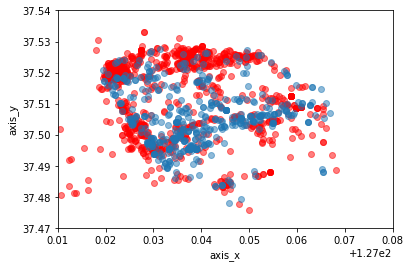

In [35]:
sns.regplot(x = 'x_axis', y = 'y_axis', data = f_place, fit_reg=False, color='r', scatter_kws={'alpha':0.5})
sns.regplot(x = 'axis_x', y = 'axis_y', data = v_place, fit_reg=False, scatter_kws={'alpha':0.5})
plt.xlim(127.01,127.08)
plt.ylim(37.47, 37.54)
plt.show()

In [42]:
train_data = v_place[['axis_x', 'axis_y']]

for k in range(2,15):
    km = KMeans(n_clusters = k).fit(train_data)
    print("score for %d clusters:%.3f"%(k, silhouette_score(train_data,km.labels_)))

score for 2 clusters:0.397
score for 3 clusters:0.470
score for 4 clusters:0.424
score for 5 clusters:0.424
score for 6 clusters:0.404
score for 7 clusters:0.403
score for 8 clusters:0.435
score for 9 clusters:0.423
score for 10 clusters:0.425
score for 11 clusters:0.408
score for 12 clusters:0.418
score for 13 clusters:0.429
score for 14 clusters:0.417


In [53]:
km = KMeans(n_clusters = 8).fit(train_data)
cluster_labels = km.labels_
v_place['cluster_label'] = cluster_labels

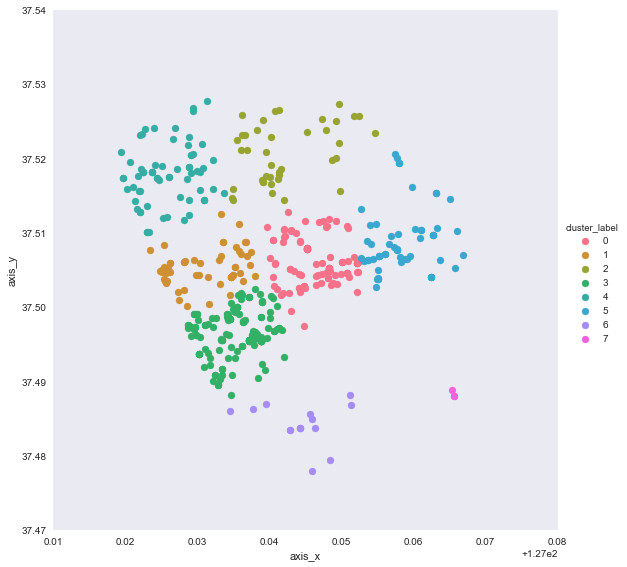

In [65]:
sns.set(style="dark", color_codes=True)
sns.FacetGrid(v_place[['axis_x','axis_y','cluster_label']], hue='cluster_label', size=8) \
   .map(plt.scatter, "axis_x", "axis_y") \
   .add_legend()
plt.xlim(127.01,127.08)
plt.ylim(37.47, 37.54)
plt.show()

In [58]:
f_place.drop('Unnamed: 0', axis = 1, inplace = True)
f_place['cluster_label'] = km.predict(f_place[['x_axis','y_axis']])
f_place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 17 columns):
Unnamed: 0        991 non-null int64
name              991 non-null object
genre             991 non-null object
view_count        991 non-null int64
review_count      991 non-null int64
url               991 non-null object
rate              991 non-null float64
favorite_count    991 non-null int64
address           991 non-null object
phone             963 non-null object
price             991 non-null object
cnt_good          991 non-null int64
cnt_soso          991 non-null int64
cnt_bad           991 non-null int64
x_axis            991 non-null float64
y_axis            991 non-null float64
cluster_label     991 non-null int32
dtypes: float64(3), int32(1), int64(7), object(6)
memory usage: 127.8+ KB


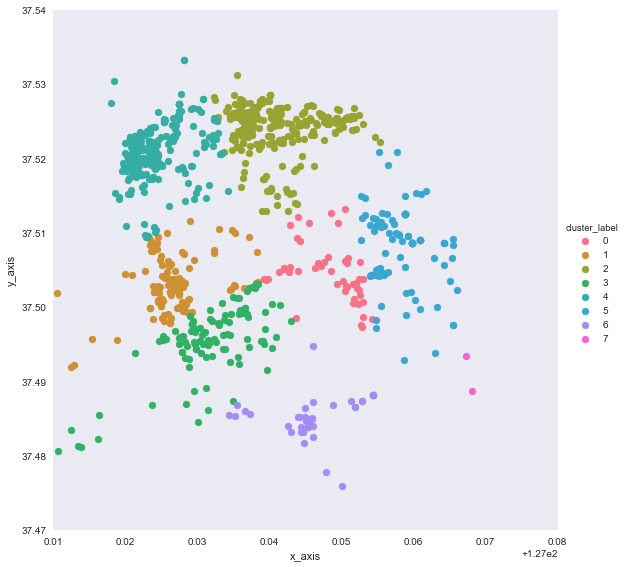

In [66]:
sns.set(style="dark", color_codes=True)
sns.FacetGrid(f_place[['x_axis','y_axis','cluster_label']], hue='cluster_label', size=8) \
   .map(plt.scatter, "x_axis", "y_axis") \
   .add_legend()
plt.xlim(127.01,127.08)
plt.ylim(37.47, 37.54)
plt.show()

(37.488107, 37.5024418)

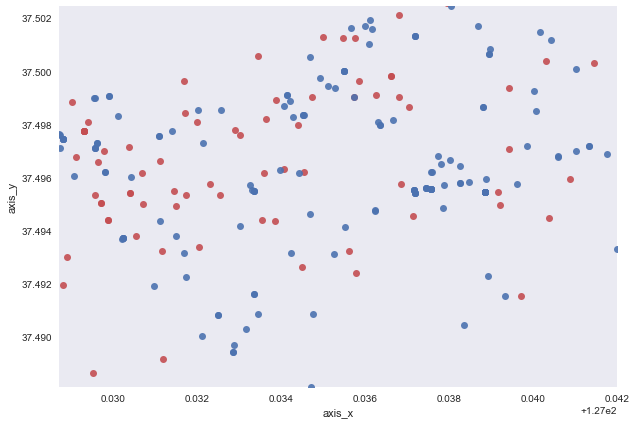

In [101]:
f_place3 = f_place[f_place.cluster_label == 3]
v_place3 = v_place[v_place.cluster_label == 3]
xlim3_min = v_place3.axis_x.min()
xlim3_max = v_place3.axis_x.max()
ylim3_min = v_place3.axis_y.min()
ylim3_max = v_place3.axis_y.max()

sns.set(style="dark", color_codes=True)
plt.figure(figsize = (10,7))
sns.regplot(x = 'x_axis', y = 'y_axis', data = f_place3, fit_reg=False, color='r', scatter_kws={'alpha':0.9})
sns.regplot(x = 'axis_x', y = 'axis_y', data = v_place3, fit_reg=False, scatter_kws={'alpha':0.9})
plt.xlim(xlim3_min, xlim3_max)
plt.ylim(ylim3_min, ylim3_max)

In [82]:
f_place3.head(3)

,name,genre,view_count,review_count,url,rate,favorite_count,address,phone,price,cnt_good,cnt_soso,cnt_bad,x_axis,y_axis,cluster_label
9,농민백암왕순대,탕 / 찌개 / 전골,76234,71,/restaurants/vnc0i7l-fd,4.7,1790,서울시 강남구 역삼동 830-9,02-501-2772,만원-2만원,63,7,1,127.031503,37.494923,3
40,나미수,한정식 / 백반 / 정통 한식,194075,55,/restaurants/Szx8NwPwXI,4.6,2736,서울시 강남구 역삼동 776-18,02-3452-1336,만원 미만,47,6,2,127.040390,37.494462,3
52,김영모과자점 (서초성당점),베이커리,35835,81,/restaurants/bUA0kILqJZ,4.6,1682,서울시 서초구 서초동 1635-1,02-3473-0688,만원 미만,64,14,3,127.021398,37.493806,3


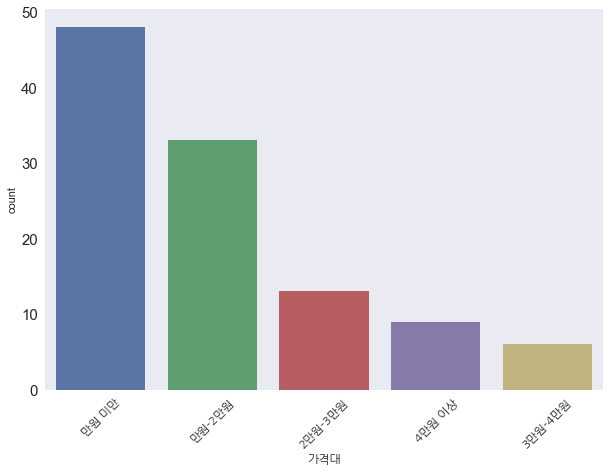

In [98]:
plt.figure(figsize = (10,7))
sns.countplot(f_place3.price, order = f_place3.price.value_counts().index)
plt.xticks(rotation = '45', fontproperties = fontprop)
plt.yticks(size = 15)
plt.xlabel("가격대", fontproperties = fontprop)
plt.show()

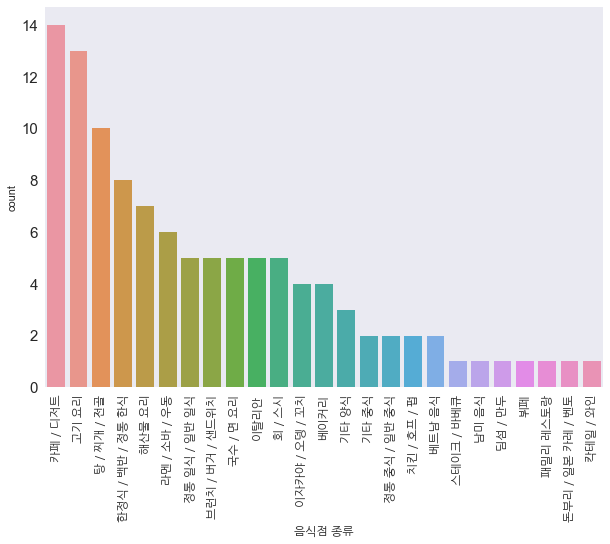

In [99]:
plt.figure(figsize = (10,7))
sns.countplot(f_place3.genre, order = f_place3.genre.value_counts().index)
plt.xticks(rotation = '90', fontproperties = fontprop)
plt.yticks(size = 15)
plt.xlabel("음식점 종류", fontproperties = fontprop)
plt.show()

In [110]:
km_sub = KMeans(n_clusters = 3).fit(v_place3[['axis_x', 'axis_y']])
v_place3['sub_labels'] = km_sub.labels_

C:\Users\lion5\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


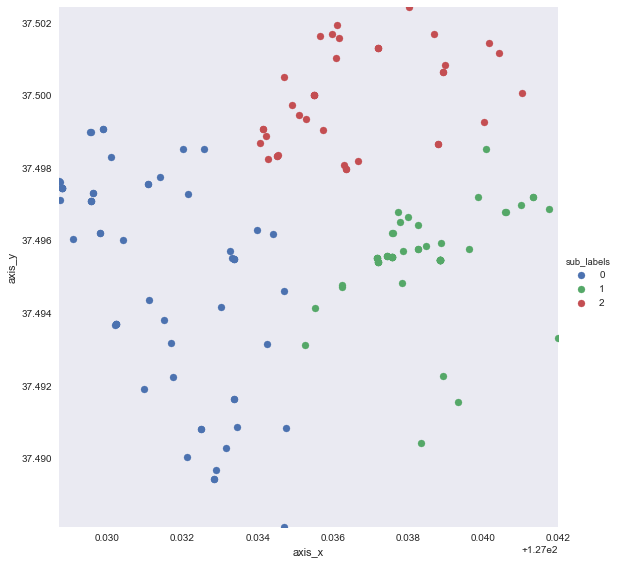

In [111]:
sns.set(style="dark", color_codes=True)
sns.FacetGrid(v_place3[['axis_x','axis_y','sub_labels']], hue='sub_labels', size=8) \
   .map(plt.scatter, "axis_x", "axis_y") \
   .add_legend()
plt.xlim(xlim3_min, xlim3_max)
plt.ylim(ylim3_min, ylim3_max)
plt.show()

C:\Users\lion5\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


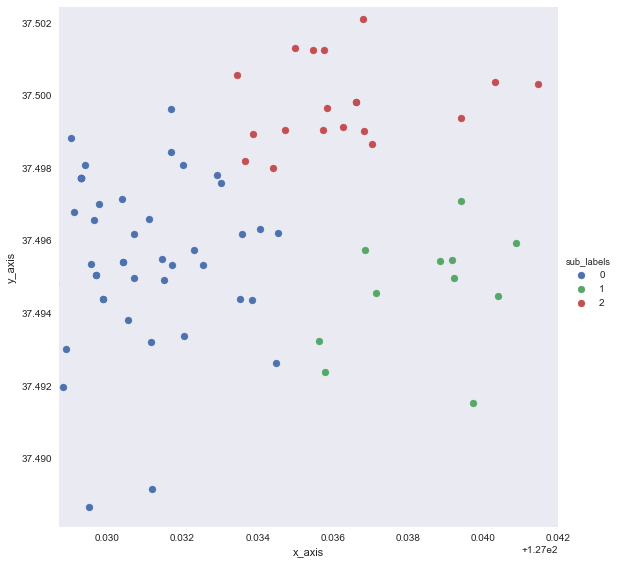

In [114]:
f_place3['sub_labels'] = km_sub.predict(f_place3[['x_axis', 'y_axis']])
sns.set(style="dark", color_codes=True)
sns.FacetGrid(f_place3[['x_axis','y_axis','sub_labels']], hue='sub_labels', size=8) \
   .map(plt.scatter, "x_axis", "y_axis") \
   .add_legend()
plt.xlim(xlim3_min, xlim3_max)
plt.ylim(ylim3_min, ylim3_max)
plt.show()

In [116]:
f_place32 = f_place3[f_place3.sub_labels == 2]

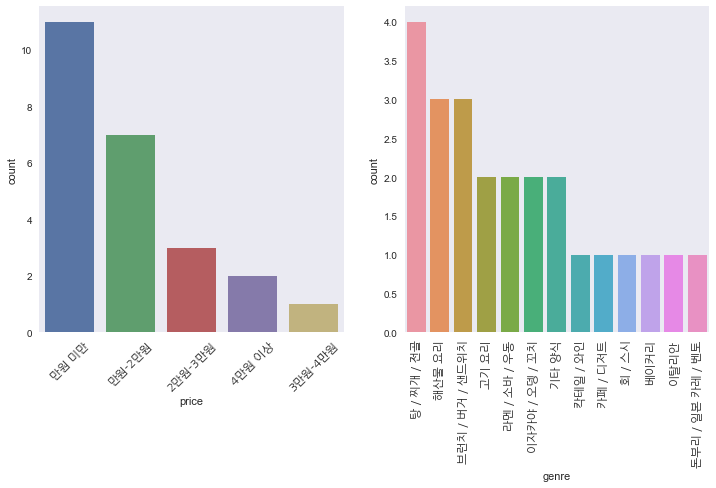

In [127]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

s1 = sns.countplot(ax = ax1, x=f_place32.price, order = f_place32.price.value_counts().index)
s1.set_xticklabels(s1.get_xticklabels(), rotation=45, fontproperties = fontprop)

s2 = sns.countplot(ax = ax2, x=f_place32.genre, order = f_place32.genre.value_counts().index)
s2.set_xticklabels(s2.get_xticklabels(), rotation=90, fontproperties = fontprop)

plt.show()

In [157]:
v_place32 = v_place3[v_place3.sub_labels == 2]

In [158]:
x3_mean = v_place32.axis_x.mean()
y3_mean = v_place32.axis_y.mean()
f_place32['from_mean_distance'] = ((f_place32.x_axis - x3_mean)**2 + (f_place32.y_axis - y3_mean)**2)**(1/2)
f_place32.sort_values(by = 'from_mean_distance', inplace = True, ascending = True)

C:\Users\lion5\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lion5\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [162]:
f_place32[(f_place32.price == "만원 미만") |(f_place32.price == "만원-2만원")].head(10)

,name,genre,view_count,review_count,url,rate,favorite_count,address,phone,price,cnt_good,cnt_soso,cnt_bad,x_axis,y_axis,cluster_label,sub_labels,from_mean_distance
164,클로리스 (강남파이낸스센터몰점),카페 / 디저트,13637,71,/restaurants/MWRYxZ2w8S,4.4,486,서울시 강남구 역삼동 737,02-553-7523,만원 미만,46,24,1,127.036624,37.499806,3,2,0.000128
212,바스버거 (역삼점),브런치 / 버거 / 샌드위치,16511,61,/restaurants/_mIAj8p6dYWF,4.3,590,서울시 강남구 역삼동 736-55,02-568-6654,만원 미만,48,12,1,127.035847,37.499643,3,2,0.000762
857,콩뿌리전주콩나물국밥 (역삼점),탕 / 찌개 / 전골,3345,16,/restaurants/6PueokXnEN,3.8,43,서울시 강남구 역삼동 739,02-2051-3381,만원 미만,8,8,0,127.036261,37.499115,3,2,0.000854
516,카페마마스 (역삼점),브런치 / 버거 / 샌드위치,15248,110,/restaurants/oH0FB_jVxg,4.0,448,서울시 강남구 역삼동 738-6,02-538-1280,만원-2만원,71,37,2,127.036820,37.499008,3,2,0.000945
437,이화수,탕 / 찌개 / 전골,9708,33,/restaurants/fHAVipJEVF,4.1,190,서울시 강남구 역삼동 736-46,02-501-5007,만원 미만,19,14,0,127.035738,37.499033,3,2,0.001205
613,토속청국장,탕 / 찌개 / 전골,4553,9,/restaurants/L25nLJf5ie,4.0,132,서울시 강남구 역삼동 738-48,02-553-1024,만원 미만,7,2,0,127.037043,37.498650,3,2,0.001356
532,가조쿠,라멘 / 소바 / 우동,4050,32,/restaurants/hcNgMKZa_PFf,4.0,214,서울시 강남구 역삼동 642-4,02-556-2177,만원 미만,27,5,0,127.035764,37.501240,3,2,0.001544
569,스윗밸런스,기타 양식,2977,18,/restaurants/z-a83U4Utbpf,4.0,196,서울시 강남구 역삼동 644-18,NaN,만원 미만,15,2,1,127.034987,37.501300,3,2,0.002094
626,바디쉐프 (GS타워점),기타 양식,4408,6,/restaurants/v2fne4_x06,4.0,100,서울시 강남구 역삼동 679,02-554-1369,만원 미만,5,0,1,127.036817,37.502099,3,2,0.002198
609,삼곱식당,고기 요리,6178,6,/restaurants/5dZVKt_pRscY,4.0,138,서울시 강남구 역삼동 669-16,02-539-0092,만원-2만원,5,1,0,127.037222,37.502589,3,2,0.002754


(37.4979585, 37.5024418)

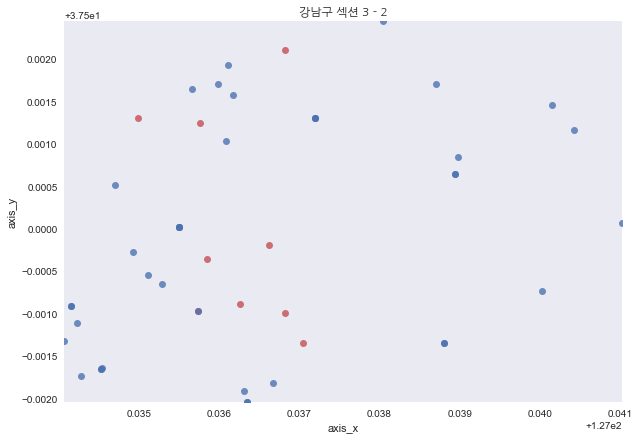

In [160]:
sns.set(style="dark", color_codes=True)
plt.figure(figsize = (10,7))
sns.regplot(x = 'x_axis', y = 'y_axis', data = f_place32[(f_place32.price == "만원 미만") |
                                                        (f_place32.price == "만원-2만원")].head(10),
            fit_reg=False, color='r', scatter_kws={'alpha':0.8})
sns.regplot(x = 'axis_x', y = 'axis_y', data = v_place32, fit_reg=False, scatter_kws={'alpha':0.8})
plt.title("강남구 섹션 3 - 2", fontproperties = fontprop)
plt.xlim(v_place32.axis_x.min(), v_place32.axis_x.max())
plt.ylim(v_place32.axis_y.min(), v_place32.axis_y.max())

In [167]:
v_place32.columns

Index(['name', 'url', 'date_found', 'number_people', 'location', 'series',
       'number_invest', 'address', 'axis_x', 'axis_y', 'address_gu',
       'address_si', 'cluster_label', 'sub_labels'],
      dtype='object')

In [171]:
v_place32.number_people.value_counts()
#인원이 201-500명인 곳은 파이브락스 - 실제로는 16명 정도

0           28
11-50명       6
1-10명        4
51-200명      1
201-500명     1
Name: number_people, dtype: int64

In [170]:
v_place32.number_invest.value_counts()

0                   37
누적 112억 5,000만 원     1
누적 4억 5,000만 원       1
누적 45억 5,000만 원      1
Name: number_invest, dtype: int64

In [172]:
v_place32.series.value_counts()

0           36
Series A     3
Series C     1
Name: series, dtype: int64

In [173]:
v_place32[v_place32.number_people == '201-500명']

,name,url,date_found,number_people,location,series,number_invest,address,axis_x,axis_y,address_gu,address_si,cluster_label,sub_labels
2051,파이브락스,https://www.rocketpunch.com/companies/5rocks,2013-06-18,201-500명,대한민국 서울특별시 강남구 테헤란로20길 20 6층,0,"누적 45억 5,000만 원",서울특별시 강남구 테헤란로20길 20,127.034537,37.498359,강남구,서울특별시,3,2
